# Portfolio Part 3 - Analysis of Loan Approval Data (2024 S2)

## Task background
In this Portfolio task, you will work on a new dataset named 'Loan Approval' which is a modified version from a synthetic Dataset for Risk Assessment and Loan Approval Modeling (many thanks to LORENZO ZOPPELLETTO for the sharing of this dataset). This dataset comprises 20,000 records of personal and financial data, designed to facilitate the development of predictive models for risk assessment and loan approval. In this portfolio part, you are mainly required to train classification models to determine the outcome of loan approval, indicating whether an applicant is likely to be approved or denied for a loan.

The dataset includes diverse features such as demographic information, credit history, employment status, income levels, existing debt, and other relevant financial metrics, providing a comprehensive foundation for sophisticated data-driven analysis and decision-making.

The dataset includes the following columns:

|Column|Meaning|
|:-----|:-----|
|ApplicationDate| Loan application date|
|Age| Applicant's age|
|AnnualIncome| Yearly income|
|CreditScore| Creditworthiness score|
|EmploymentStatus| Job situation|
|EducationLevel| Highest education attained|
|Experience| Work experience|
|LoanAmount| Requested loan size|
|LoanDuration| Loan repayment period|
|MaritalStatus| Applicant's marital state|
|NumberOfDependents| Number of dependents|
|HomeOwnershipStatus| Homeownership type|
|MonthlyDebtPayments| Monthly debt obligations|
|CreditCardUtilizationRate| Credit card usage percentage|
|NumberOfOpenCreditLines| Active credit lines|
|NumberOfCreditInquiries| Credit checks count|
|DebtToIncomeRatio| Debt to income proportion|
|BankruptcyHistory| Bankruptcy records|
|LoanPurpose| Reason for loan|
|PreviousLoanDefaults| Prior loan defaults|
|PaymentHistory| Past payment behavior|
|LengthOfCreditHistory| Credit history duration|
|SavingsAccountBalance| Savings account amount|
|CheckingAccountBalance| Checking account funds|
|TotalAssets| Total owned assets|
|TotalLiabilities| Total owed debts|
|MonthlyIncome| Income per month|
|UtilityBillsPaymentHistory| Utility payment record|
|JobTenure| Job duration|
|NetWorth| Total financial worth|
|BaseInterestRate| Starting interest rate|
|InterestRate| Applied interest rate|
|MonthlyLoanPayment| Monthly loan payment|
|TotalDebtToIncomeRatio| Total debt against income|
|LoanApproved| Loan approval status|
|RiskScore| Risk assessment score|

## Task Description
Your high level goal in this notebook is to build and evaluate predictive models for 'loan approval' from other available features. More specifically, you need to complete the following major tasks:

1. Clean and preprocess the dataset for the downstream data analysis tasks.

2. Build and evaluate logistic regression models with this datasets.

3. Build and evaluate KNN models with this datasets.

Note 1: While the main steps of each task have been given with the requirements, you should learn how to properly organise and comment your notebook by yourself to ensure that your notebook file is professional and readable.

Note 2: You will be evaluated on the accuracy of the model, the process that you produce the results,  and your clear description and justification of your implementation. So, try your best to comment your source code to showing your understanding and critical thinking.


## Load the dataset and show the basic information

In [47]:
import warnings

warnings.filterwarnings('ignore')

import pandas as pd

data = pd.read_csv('loan_approval.csv')
data.head()

,ApplicationDate,Age,AnnualIncome,CreditScore,EmploymentStatus,EducationLevel,Experience,LoanAmount,LoanDuration,MaritalStatus,...,MonthlyIncome,UtilityBillsPaymentHistory,JobTenure,NetWorth,BaseInterestRate,InterestRate,MonthlyLoanPayment,TotalDebtToIncomeRatio,LoanApproved,RiskScore
0,2018-01-01,45.0,39948,617,Employed,Master,22,13152,48,Married,...,3329.000000,0.724972,11,126928,0.199652,0.227590,419.805992,0.181077,0,NaN
1,2018-01-02,38.0,39709,628,Employed,Associate,15,26045,48,Single,...,3309.083333,0.935132,3,43609,0.207045,0.201077,794.054238,0.389852,0,52.0
2,2018-01-03,47.0,40724,570,Employed,Bachelor,26,17627,36,Married,...,3393.666667,0.872241,6,5205,0.217627,0.212548,666.406688,0.462157,0,NaN
3,2018-01-04,58.0,69084,545,Employed,High School,34,37898,96,Single,...,5757.000000,0.896155,5,99452,0.300398,0.300911,1047.506980,0.313098,0,NaN
4,2018-01-05,37.0,103264,594,Employed,Associate,17,9184,36,Married,...,8605.333333,0.941369,5,227019,0.197184,0.175990,330.179140,0.070210,1,NaN


In [48]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20000 entries, 0 to 19999
Data columns (total 36 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   ApplicationDate             20000 non-null  object 
 1   Age                         19900 non-null  float64
 2   AnnualIncome                20000 non-null  int64  
 3   CreditScore                 20000 non-null  int64  
 4   EmploymentStatus            20000 non-null  object 
 5   EducationLevel              20000 non-null  object 
 6   Experience                  20000 non-null  int64  
 7   LoanAmount                  20000 non-null  int64  
 8   LoanDuration                20000 non-null  int64  
 9   MaritalStatus               19900 non-null  object 
 10  NumberOfDependents          20000 non-null  int64  
 11  HomeOwnershipStatus         20000 non-null  object 
 12  MonthlyDebtPayments         20000 non-null  int64  
 13  CreditCardUtilizationRate   200

In [49]:
data.describe(include="all")

,ApplicationDate,Age,AnnualIncome,CreditScore,EmploymentStatus,EducationLevel,Experience,LoanAmount,LoanDuration,MaritalStatus,...,MonthlyIncome,UtilityBillsPaymentHistory,JobTenure,NetWorth,BaseInterestRate,InterestRate,MonthlyLoanPayment,TotalDebtToIncomeRatio,LoanApproved,RiskScore
count,20000,19900.000000,20000.000000,20000.000000,20000,20000,20000.000000,20000.000000,20000.000000,19900,...,20000.000000,20000.000000,20000.000000,2.000000e+04,20000.000000,20000.000000,20000.000000,20000.000000,20000.000000,1000.000000
unique,20000,NaN,NaN,NaN,3,5,NaN,NaN,NaN,4,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
top,2018-01-01,NaN,NaN,NaN,Employed,Bachelor,NaN,NaN,NaN,Married,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
freq,1,NaN,NaN,NaN,17036,6054,NaN,NaN,NaN,9999,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mean,NaN,39.751759,59161.473550,571.612400,NaN,NaN,17.522750,24882.867800,54.057000,NaN,...,4891.715521,0.799918,5.002650,7.229432e+04,0.239124,0.239110,911.607052,0.402182,0.239000,50.687600
std,NaN,11.630809,40350.845168,50.997358,NaN,NaN,11.316836,13427.421217,24.664857,NaN,...,3296.771598,0.120665,2.236804,1.179200e+05,0.035509,0.042205,674.583473,0.338924,0.426483,7.881033
min,NaN,18.000000,15000.000000,343.000000,NaN,NaN,0.000000,3674.000000,12.000000,NaN,...,1250.000000,0.259203,0.000000,1.000000e+03,0.130101,0.113310,97.030193,0.016043,0.000000,30.400000
25%,NaN,31.750000,31679.000000,540.000000,NaN,NaN,9.000000,15575.000000,36.000000,NaN,...,2629.583333,0.727379,3.000000,8.734750e+03,0.213889,0.209142,493.763700,0.179693,0.000000,46.000000
50%,NaN,40.000000,48566.000000,578.000000,NaN,NaN,17.000000,21914.500000,48.000000,NaN,...,4034.750000,0.820962,5.000000,3.285550e+04,0.236157,0.235390,728.511452,0.302711,0.000000,52.000000
75%,NaN,48.000000,74391.000000,609.000000,NaN,NaN,25.000000,30835.000000,72.000000,NaN,...,6163.000000,0.892333,6.000000,8.882550e+04,0.261533,0.265532,1112.770759,0.509214,0.000000,56.000000


## Task 1: Clean the datasets (10 marks)

### Step 1.1 Handle the missing values with follwoing rules (5 marks)
1. If over 50% of the values of a column are missing, the column should be removed from the data frame;
2. For a categorical column, if a row contains a missing value, you need to delete the whole row;
3. For a numerical column, if a row contains a missing value, you need to perform a missing value imputation with the average value of the column.

In [50]:
# 1. Removing columns with more than 50% missing values
# 50% of the number of rows
threshold = 0.5 * len(data)
data = data.dropna(thresh=threshold, axis=1)

# 2. Removing rows with missing values in categorical columns
categorical_columns = data.select_dtypes(include=['object']).columns
data = data.dropna(subset=categorical_columns)

# 3. performing a missing value imputation with the average value of the column if a row contains a missing value
numerical_columns = data.select_dtypes(include=['float64', 'int64']).columns
data[numerical_columns] = data[numerical_columns].fillna(data[numerical_columns].mean())

# Verifying the cleaned dataset for better understanding
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 19900 entries, 0 to 19999
Data columns (total 35 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   ApplicationDate             19900 non-null  object 
 1   Age                         19900 non-null  float64
 2   AnnualIncome                19900 non-null  int64  
 3   CreditScore                 19900 non-null  int64  
 4   EmploymentStatus            19900 non-null  object 
 5   EducationLevel              19900 non-null  object 
 6   Experience                  19900 non-null  int64  
 7   LoanAmount                  19900 non-null  int64  
 8   LoanDuration                19900 non-null  int64  
 9   MaritalStatus               19900 non-null  object 
 10  NumberOfDependents          19900 non-null  int64  
 11  HomeOwnershipStatus         19900 non-null  object 
 12  MonthlyDebtPayments         19900 non-null  int64  
 13  CreditCardUtilizationRate   19900 no

### Step 1.2 Handle categorical attributes (5 marks)
1. If all the categorical values of a column are unique, this column does not provide any statistical informaiton and should be deleted.
2. Use one hot encoding to convert the categorical values into numerical ones.

In [52]:
# Identifying categorical columns
categorical_columns = data.select_dtypes(include=['object']).columns

# 1. Removing categorical columns where all values are unique
# Using for Loop through each categorical column
for col in categorical_columns:
    # Checking if the number of unique values equals the number of rows
    if data[col].nunique() == len(data):
        # Dropping the column if all values are unique
        data = data.drop(columns=[col])

# 2. Performing one-hot encoding on the remaining categorical columns
data = pd.get_dummies(data, columns=categorical_columns, drop_first=True)

# Verifying the cleaned dataset for better understanding
data.info()


<class 'pandas.core.frame.DataFrame'>
Index: 19900 entries, 0 to 19999
Data columns (total 45 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   Age                             19900 non-null  float64
 1   AnnualIncome                    19900 non-null  int64  
 2   CreditScore                     19900 non-null  int64  
 3   Experience                      19900 non-null  int64  
 4   LoanAmount                      19900 non-null  int64  
 5   LoanDuration                    19900 non-null  int64  
 6   NumberOfDependents              19900 non-null  int64  
 7   MonthlyDebtPayments             19900 non-null  int64  
 8   CreditCardUtilizationRate       19900 non-null  float64
 9   NumberOfOpenCreditLines         19900 non-null  int64  
 10  NumberOfCreditInquiries         19900 non-null  int64  
 11  DebtToIncomeRatio               19900 non-null  float64
 12  BankruptcyHistory               19900

## Task 2: Build a logistic regression classification model (25 marks)

### Step 2.1 Specify the features and the label, and split the dataset into training data and testing data (5 marks)
1. The attirbute "LoanApproved" is the label, which is the prediction target. The remaining attributes are the features.
2. The ratio for splitting the dataset is 80% for training and 20% for testing. Note that you need to set the "random_state" parameter as your student ID to produce your personlised splitting. Failing to do so will lose marks.

In [53]:
# importing train_test_split
from sklearn.model_selection import train_test_split

# Step 2.1: Specifying the features and the label
X = data.drop(columns=['LoanApproved'])  # Features (all columns except 'LoanApproved')
y = data['LoanApproved']

# Spliting the dataset (80% training, 20% testing) with random_state as my student ID (48046493)
student_id = 48046493
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=student_id)

# Verifying the shapes of the resulting datasets
print(f"Training set: {X_train.shape}, {y_train.shape}")
print(f"Testing set: {X_test.shape}, {y_test.shape}")


Training set: (15920, 44), (15920,)
Testing set: (3980, 44), (3980,)


### Step 2.2 Build a logistic regression model (10 marks)
1. Train a logistic regression model
2. Report two classification performance metrics (accuracy and f1-score) on the testing data
3. Also report the two metrics on the training data, and compare the results with that of the testing data. Make a justification on whether the model is overfitting based on the comparison.

In [54]:
#importing LogisticRegression , accuracy_score, f1_score
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, f1_score

# Step 2.2: Training a logistic regression model
log_reg = LogisticRegression(random_state=student_id, max_iter=1000)
log_reg.fit(X_train, y_train)

# Making Predictions on the training data
y_train_pred = log_reg.predict(X_train)

# Making Predictions on the testing data
y_test_pred = log_reg.predict(X_test)

# Performance on training data
train_accuracy = accuracy_score(y_train, y_train_pred)
train_f1 = f1_score(y_train, y_train_pred)

# Performance on testing data
test_accuracy = accuracy_score(y_test, y_test_pred)
test_f1 = f1_score(y_test, y_test_pred)

# Printing results
print(f"Training Accuracy: {train_accuracy:.4f}")
print(f"Training F1-Score: {train_f1:.4f}")
print(f"Testing Accuracy: {test_accuracy:.4f}")
print(f"Testing F1-Score: {test_f1:.4f}")

# Comparing results for overfitting
if train_accuracy > test_accuracy and (train_accuracy - test_accuracy) > 0.05:
    print("The model may be overfitting, as there is a significant drop in performance on the test set.")
else:
    print("The model generalizes well, with similar performance on both training and testing sets.")


Training Accuracy: 0.9024
Training F1-Score: 0.7851
Testing Accuracy: 0.9068
Testing F1-Score: 0.7917
The model generalizes well, with similar performance on both training and testing sets.


### Step 2.3 Perform the recursive feature elimination (RFE) technique to identify the effective features for building the model (10 marks)
1. Visulise the change of the two performance metrics with respect to the number of eliminated features using a line chart.
2. In terms of the visualisation result, select a good value for the number of eliminated features with considering both performance maximisation and feature minimisation (two competing goals). Run the RFE again with the chosen number of eliminated features to obtain the corresponding set of retained features.

In [55]:
#importing all the required libraries
from sklearn.feature_selection import RFE
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, f1_score
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler

# Scaling the data
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Initializing logistic regression
log_reg = LogisticRegression(random_state=student_id, max_iter=1000, solver='liblinear')

# Initializing lists to store the metrics
accuracy_scores = []
f1_scores = []

# Performing RFE for different numbers of retained features
num_features = X_train.shape[1]
for n in range(num_features, 0, -1):
    rfe = RFE(estimator=log_reg, n_features_to_select=n)
    rfe.fit(X_train_scaled, y_train)

    # Making predictions on the test set
    y_test_pred_rfe = rfe.predict(X_test_scaled)

    # Calculating performance metrics
    accuracy = accuracy_score(y_test, y_test_pred_rfe)
    f1 = f1_score(y_test, y_test_pred_rfe)

    # Appending the metrics to lists
    accuracy_scores.append(accuracy)
    f1_scores.append(f1)

# Reversing the lists to show increasing number of retained features
accuracy_scores.reverse()
f1_scores.reverse()


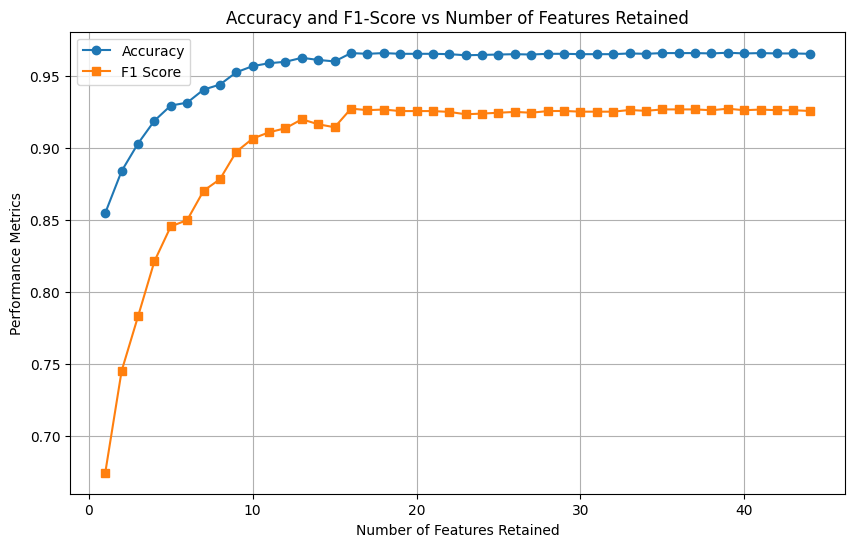

In [56]:
# Plotting the performance metrics against the number of retained features
plt.figure(figsize=(10, 6))

# Plotting accuracy and F1-score
plt.plot(range(1, num_features + 1), accuracy_scores, label='Accuracy', marker='o')
plt.plot(range(1, num_features + 1), f1_scores, label='F1 Score', marker='s')

# Adding labels and title
plt.xlabel('Number of Features Retained')
plt.ylabel('Performance Metrics')
plt.title('Accuracy and F1-Score vs Number of Features Retained')
plt.legend()
plt.grid(True)

# Showing the plot
plt.show()


In [57]:
# Chosen optimal number of retained features based on the visualization
optimal_features = 8

# Rerunning RFE with the optimal number of features
rfe_optimal = RFE(estimator=log_reg, n_features_to_select=optimal_features)
rfe_optimal.fit(X_train_scaled, y_train)

# Getting the retained features
retained_features = X_train.columns[rfe_optimal.support_]
print(f"Retained features: {retained_features}")


Retained features: Index(['CreditScore', 'LoanAmount', 'BankruptcyHistory',
       'LengthOfCreditHistory', 'MonthlyIncome', 'NetWorth', 'InterestRate',
       'TotalDebtToIncomeRatio'],
      dtype='object')


## Task 3: Build a KNN classification model (25 marks)

### Step 3.1 Build 1-NN classifier (5 marks)
1. Slect the features identifed in Step 2.3 for this task
2. Buid 1-NN classifier and report two classification performance metrics (accuracy and f1-score) on the testing data
3. Also report the two metrics on the training data, and compare the results with that of the testing data. Make a justification on whether the model is overfitting based on the comparison.

In [58]:
#importing required libraries
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, f1_score

# Preparing the data with selected features
X_train_selected = X_train_scaled[:, rfe_optimal.support_]
X_test_selected = X_test_scaled[:, rfe_optimal.support_]

# Initializing the 1-NN classifier
knn = KNeighborsClassifier(n_neighbors=1)

# Fitting the model on the training data
knn.fit(X_train_selected, y_train)

# Making predictions on training and testing data
y_train_pred = knn.predict(X_train_selected)
y_test_pred = knn.predict(X_test_selected)

# Calculating performance metrics
train_accuracy = accuracy_score(y_train, y_train_pred)
train_f1 = f1_score(y_train, y_train_pred)

test_accuracy = accuracy_score(y_test, y_test_pred)
test_f1 = f1_score(y_test, y_test_pred)

# Reporting the metrics
print("Training Accuracy:", train_accuracy)
print("Training F1 Score:", train_f1)
print("Testing Accuracy:", test_accuracy)
print("Testing F1 Score:", test_f1)

# Justification on overfitting
if train_accuracy > test_accuracy and train_f1 > test_f1:
    print("The model is likely overfitting as it performs significantly better on the training data than on the testing data.")
else:
    print("The model appears to generalize well as the performance metrics on the training and testing data are comparable.")


Training Accuracy: 1.0
Training F1 Score: 1.0
Testing Accuracy: 0.9022613065326633
Testing F1 Score: 0.7889310906131307
The model is likely overfitting as it performs significantly better on the training data than on the testing data.


### Step 3.2 Use the grid search and cross validation techniques to study the performance change with respect to the hyperparameter K (10 marks)
1. User grid search to search K in the range (1, 30) both inclusive with 5-fold cross validation. The performance metric used for search is accuracy.
2. Visualise the performance change with respect to K using a line chart. Report the two performance metrics for the best case.

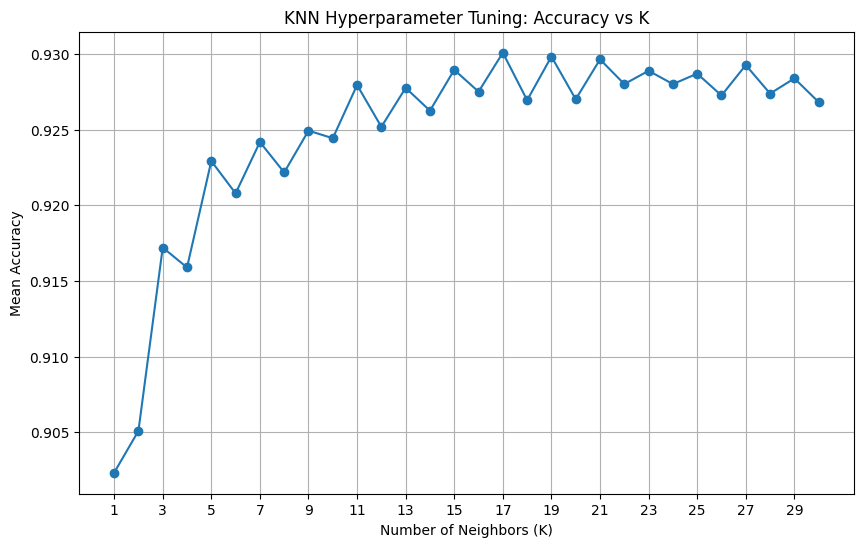

Best K: 17
Training Accuracy: 0.9391959798994974
Training F1 Score: 0.8664459161147903
Testing Accuracy: 0.9276381909547738
Testing F1 Score: 0.8382022471910112


In [59]:
# importing all required libraries
from sklearn.model_selection import GridSearchCV
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, f1_score
import matplotlib.pyplot as plt
import numpy as np

# Setting up the parameter grid for K
param_grid = {'n_neighbors': np.arange(1, 31)}

# Initializing the KNN classifier
knn = KNeighborsClassifier()

# Setting up Grid Search with 5-fold cross-validation
grid_search = GridSearchCV(knn, param_grid, cv=5, scoring='accuracy', return_train_score=True)

# Fitting the grid search to the training data
grid_search.fit(X_train_selected, y_train)

# Visualizing performance change
results = grid_search.cv_results_

plt.figure(figsize=(10, 6))
plt.plot(results['param_n_neighbors'], results['mean_test_score'], marker='o')
plt.xlabel('Number of Neighbors (K)')
plt.ylabel('Mean Accuracy')
plt.title('KNN Hyperparameter Tuning: Accuracy vs K')
plt.xticks(np.arange(1, 31, step=2))  # Set x-ticks for clarity
plt.grid()
plt.show()

# Reporting the best case performance
best_k = grid_search.best_params_['n_neighbors']
best_knn = grid_search.best_estimator_

# Making predictions with the best model
y_train_pred_best = best_knn.predict(X_train_selected)
y_test_pred_best = best_knn.predict(X_test_selected)

# Calculating performance metrics
best_train_accuracy = accuracy_score(y_train, y_train_pred_best)
best_train_f1 = f1_score(y_train, y_train_pred_best)

best_test_accuracy = accuracy_score(y_test, y_test_pred_best)
best_test_f1 = f1_score(y_test, y_test_pred_best)

# Reporting the best case performance
print(f"Best K: {best_k}")
print("Training Accuracy:", best_train_accuracy)
print("Training F1 Score:", best_train_f1)
print("Testing Accuracy:", best_test_accuracy)
print("Testing F1 Score:", best_test_f1)


### Step 3.3 Study how the distance metrics affect the model performance (10 marks)
1. Change the distance metric parameter to 3 distance types: 'euclidean'(also l2), 'l1', and 'cosine', respectively, and visualise the model performance with these 3 distances, using a bar chart for both accuracy and f1 scores.
2. Compare the performance metrics, which is the best? Which is the worest?

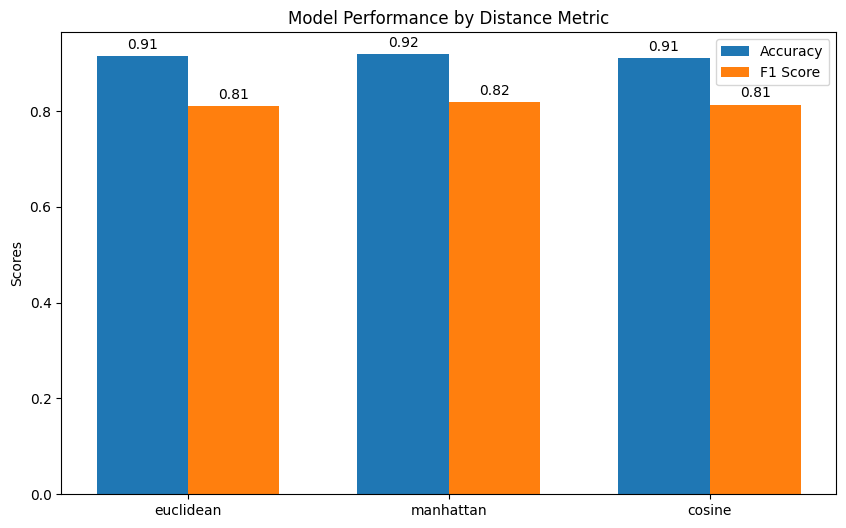

In [60]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, f1_score
import matplotlib.pyplot as plt
import numpy as np

# Assuming best_k has been defined from the previous grid search
best_k = 5  # Replacing with the best K found earlier

# Defining the distance metrics
distance_metrics = ['euclidean', 'manhattan', 'cosine']

# Lists to store performance metrics
accuracy_scores = []
f1_scores = []

# Looping through each distance metric
for metric in distance_metrics:
    # Initializing the KNN classifier with the current distance metric
    knn = KNeighborsClassifier(n_neighbors=best_k, metric=metric)

    # Fitting the model to the training data
    knn.fit(X_train_selected, y_train)

    # Making predictions on the training and testing data
    y_train_pred = knn.predict(X_train_selected)
    y_test_pred = knn.predict(X_test_selected)

    # Calculating performance metrics
    test_accuracy = accuracy_score(y_test, y_test_pred)
    test_f1 = f1_score(y_test, y_test_pred)

    # Appending the test metrics to the lists
    accuracy_scores.append(test_accuracy)
    f1_scores.append(test_f1)

# Setting up the bar chart for accuracy and F1 scores
x = np.arange(len(distance_metrics))  # the label locations

# Bar width
width = 0.35

fig, ax = plt.subplots(figsize=(10, 6))

# Plotting accuracy and F1 score
bars1 = ax.bar(x - width/2, accuracy_scores, width, label='Accuracy')
bars2 = ax.bar(x + width/2, f1_scores, width, label='F1 Score')

# Adding some text for labels, title and custom x-axis tick labels, etc.
ax.set_ylabel('Scores')
ax.set_title('Model Performance by Distance Metric')
ax.set_xticks(x)
ax.set_xticklabels(distance_metrics)
ax.legend()

# Adding value labels on top of bars
def add_value_labels(bars):
    for bar in bars:
        height = bar.get_height()
        ax.annotate(f'{height:.2f}',  # format the height to 2 decimal places
                    xy=(bar.get_x() + bar.get_width() / 2, height),  # position the label
                    xytext=(0, 3),  # 3 points vertical offset
                    textcoords="offset points",
                    ha='center', va='bottom')

add_value_labels(bars1)
add_value_labels(bars2)

plt.show()


Comparing the performance metrics, which is the best? Which is the worest?


*   Best Metric: The Manhattan distance is the best choice for your KNN classifier based on both accuracy and F1 score.
*   Worst Metric: The Cosine distance and Euclidean distance perform similarly, both lagging slightly behind the Manhattan distance.

